In [1]:
from pyevolve import G1DBinaryString
from pyevolve import GSimpleGA
from pyevolve import Selectors
from pyevolve import DBAdapters

%matplotlib inline

In [2]:
#fitness function
    
def fitness(chromosome):
    score = 0.0
    # iterate over the chromosome
    for value in chromosome:
        if value==1:
            score += 1
    return score

In [3]:
# Chromosome representation

# genome = bitstring
genome = G1DBinaryString.G1DBinaryString(20)

# how to compute the fitness
genome.evaluator.set(fitness)

# GA initialisation
ga = GSimpleGA.GSimpleGA(genome)
ga.setPopulationSize(100)
ga.setMutationRate(0.01)
ga.setCrossoverRate(0.9)
ga.selector.set(Selectors.GRouletteWheel)
ga.setElitism(True)

# Record evolution results in a database
sqlite_adapter = DBAdapters.DBSQLite(identify="log_bit-string")
ga.setDBAdapter(sqlite_adapter)

# Number of generations
ga.setGenerations(100)

# run the GA and print out stats every freq_stats generations
ga.evolve(freq_stats=10)

# Final best solution
print(ga.bestIndividual())

Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [11.86(14.00)/7.54(5.00)/9.88(9.88)]
Gen. 10 (10.00%): Max/Min/Avg Fitness(Raw) [14.72(18.00)/10.44(8.00)/12.27(12.27)]
Gen. 20 (20.00%): Max/Min/Avg Fitness(Raw) [17.23(19.00)/11.04(9.00)/14.36(14.36)]
Gen. 30 (30.00%): Max/Min/Avg Fitness(Raw) [17.39(19.00)/11.60(10.00)/14.49(14.49)]
Gen. 40 (40.00%): Max/Min/Avg Fitness(Raw) [19.62(19.00)/10.98(12.00)/16.35(16.35)]
Gen. 50 (50.00%): Max/Min/Avg Fitness(Raw) [19.92(20.00)/13.08(13.00)/16.60(16.60)]
Gen. 60 (60.00%): Max/Min/Avg Fitness(Raw) [20.00(20.00)/13.00(13.00)/16.67(16.67)]
Gen. 70 (70.00%): Max/Min/Avg Fitness(Raw) [20.27(20.00)/12.66(13.00)/16.89(16.89)]
Gen. 80 (80.00%): Max/Min/Avg Fitness(Raw) [20.02(20.00)/12.98(13.00)/16.68(16.68)]
Gen. 90 (90.00%): Max/Min/Avg Fitness(Raw) [20.08(20.00)/11.89(12.00)/16.73(16.73)]
Gen. 100 (100.00%): Max/Min/Avg Fitness(Raw) [20.44(20.00)/12.41(13.00)/17.03(17.03)]
Total time elapsed: 1.393 seconds.
- GenomeBase
	Score:			 20.000000
	Fitness:		 2

Pyevolve 0.6rc1 - Graph Plot Tool
By Christian S. Perone

Loading modules....
Loading database and creating graph...
100 generations found !


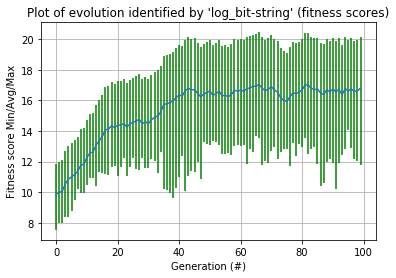

In [4]:
# Generate a graph showing the evolutionary results: fitness vs generations
%run pyevolve_graph.py -i log_bit-string -2

In [5]:
%pwd

u'C:\\Users\\Nortalle\\Desktop\\BA6\\MLG\\labGA'

Pyevolve 0.6rc1 - Graph Plot Tool
By Christian S. Perone

Loading modules....
Loading database and creating graph...
100 generations found !


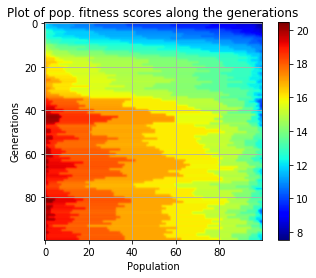

In [6]:
# Generate a heatmap of population fitness score distribution over generations
%run pyevolve_graph.py -i log_bit-string -9